In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

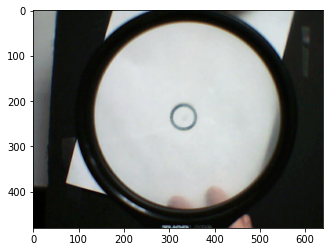

In [54]:
im = cv2.imread('l4t4.png')
plt.imshow(im)

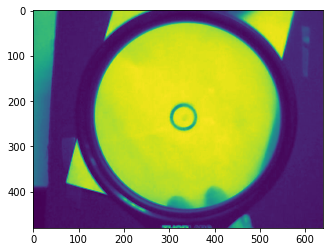

In [55]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

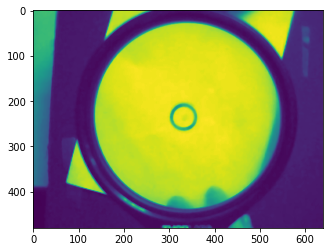

In [56]:
gray = cv2.medianBlur(gray, 5)
plt.imshow(gray)

In [111]:
rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=400, param2=30,
                           minRadius=1, maxRadius=300)
im = cv2.imread('l4t4.png')

In [112]:
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(im, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(im, center, radius, (255, 0, 255), 3)

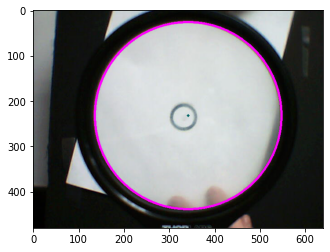

In [113]:
plt.imshow(im)

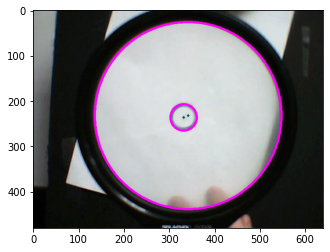

In [114]:
rows = gray.shape[0]
circles_small = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=100, param2=30,
                           minRadius=1, maxRadius=30)
if circles_small is not None:
    circles_small = np.uint16(np.around(circles_small))
    for i in circles_small[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im, center, radius, (255, 0, 255), 3)
plt.imshow(im)

In [115]:
print(circles, circles_small)

[[[342 232 206]]] [[[332 236  29]]]


In [129]:
big_r_circle = 3.81

for i in circles:
    r_small_circ_pix = i[0][2]
    print("radius of big circle: "+ str(r_small_circ_pix) + " pixels")
    print('known value of big circle: ' + str(big_r_circle) + " cm")
    cmppx = big_r_circle/i[0][2]
    print("converted cmppx: " + str(cmppx))

radius of big circle: 206 pixels
known value of big circle: 3.81 cm
converted cmppx: 0.018495145631067963


In [131]:
for j in circles_small:
    r_small_circ_pix = j[0][2]
    real_val = r_small_circ_pix * cmppx
    print(real_val)

0.536359223300971
